In [1]:
!pip install wordcloud

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import re

In [3]:
restaurant_review_data = pd.read_csv('/home/neosoft/Desktop/restaurant_reviews.txt', delimiter=";", names=['Review', 'Emotion'])
restaurant_review_data.head()

,Review,Emotion
0,i didnt feel humiliated,sadness
1,i can go from feeling so hopeless to so damned...,sadness
2,im grabbing a minute to post i feel greedy wrong,anger
3,i am ever feeling nostalgic about the fireplac...,love
4,i am feeling grouchy,anger


In [4]:
restaurant_review_data.shape

(16000, 2)

In [5]:
#view a sample of the contents of the dataset using the sample() 
restaurant_review_data.sample(5)

,Review,Emotion
6660,i feel a little glad to be distant from others...,joy
1380,i stop feeling so mad i ll stop behaving like ...,anger
3556,i know who all think this way so i ve always f...,fear
3839,i can feel myself agitated now so im going to ...,anger
14475,i was still feeling troubled,sadness


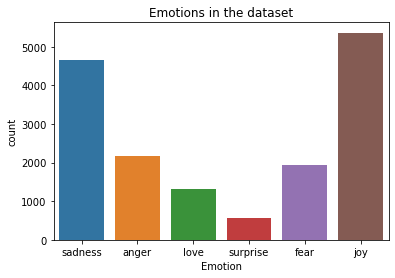

In [6]:
#Check for the various target labels in the dataset
sns.countplot(x = restaurant_review_data['Emotion'])
plt.title('Emotions in the dataset')
plt.show()

In [7]:
# Now merging these 6 labels into two classes i.e., Positive and Negative sentiment
# joy, love and surprise are categorises as Positive Sentiment
# anger, sadness and fear are categorises as Negative Sentiment

restaurant_review_data['Emotion'].replace({"surprise":1, "love":1, "joy":1, "fear":0, "anger":0, "sadness":0}, inplace=True)
restaurant_review_data.head()

,Review,Emotion
0,i didnt feel humiliated,0
1,i can go from feeling so hopeless to so damned...,0
2,im grabbing a minute to post i feel greedy wrong,0
3,i am ever feeling nostalgic about the fireplac...,1
4,i am feeling grouchy,0


In [8]:
restaurant_review_data['Emotion'].value_counts()

0    8762
1    7238
Name: Emotion, dtype: int64

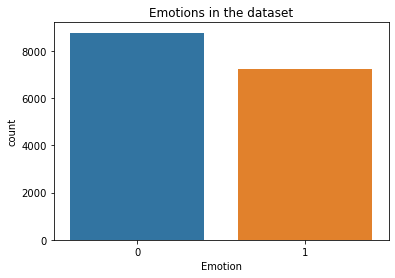

In [9]:
#Check for the various target labels in the dataset
sns.countplot(x = restaurant_review_data['Emotion'])
plt.title('Emotions in the dataset')
plt.show()

# Data Preprocessing

In [10]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

In [11]:
#Creating object of WordNetLemmatizer
lm = WordNetLemmatizer()

In [12]:
result = []     
for review in restaurant_review_data['Review']:
    
    #Using a regular expression, we will get rid of any characters apart from alphabets.
    new_review = re.sub('[^a-zA-Z]', ' ', review)
    
    #Converting the strings to lowercase to avoid creating different vectors for the same word.
    new_review = new_review.lower()
    
    new_review = new_review.split()
    
    #Removing stopwords in the data which do not add much value.
    #Then, we will perform lemmatization on each word for getting lemma i.e., the root word.
    new_review = [lm.lemmatize(word) for word in new_review if word not in set(stopwords.words('english'))]
    
    result.append(' '.join(word for word in new_review))
  
print(result)

['didnt feel humiliated', 'go feeling hopeless damned hopeful around someone care awake', 'im grabbing minute post feel greedy wrong', 'ever feeling nostalgic fireplace know still property', 'feeling grouchy', 'ive feeling little burdened lately wasnt sure', 'ive taking milligram time recommended amount ive fallen asleep lot faster also feel like funny', 'feel confused life teenager jaded year old man', 'petronas year feel petronas performed well made huge profit', 'feel romantic', 'feel like make suffering seeing mean something', 'feel running divine experience expect type spiritual encounter', 'think easiest time year feel dissatisfied', 'feel low energy thirsty', 'immense sympathy general point possible proto writer trying find time write corner life sign agent let alone publishing contract feel little precious', 'feel reassured anxiety side', 'didnt really feel embarrassed', 'feel pretty pathetic time', 'started feeling sentimental doll child began collection vintage barbie doll si

# Word Cloud

Create a Word Cloud which is a data visualization technique 
which helps to find the most frequent words in the dataset. 
Word Cloud make more frequent words appear enlarged as compared to less frequent words

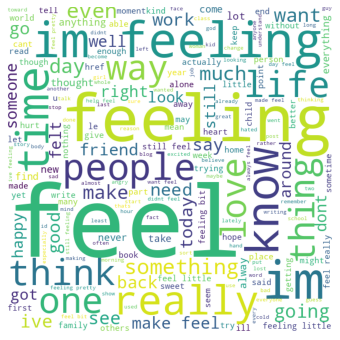

In [13]:
from wordcloud import WordCloud

text = ' '.join(result)


# Create WordCloud 
word_cloud = WordCloud(width = 600, height = 600, 
                       background_color ='white', 
                       min_font_size = 10).generate(text)

# Set wordcloud figure size
plt.figure(figsize = (8, 6)) 

# Show image
plt.imshow(word_cloud) 

# Remove Axis
plt.axis("off")  

# show plot
plt.show()

# Bag of Words (BOW)

Converting text into vector(numerical data) is called BOW.                                

The bag-of-words model is a way of representing text data when modeling text with machine learning algorithms.

In [14]:
# Creating the Bag of Words (BOW: vectors word frequency(count)) model
from sklearn.feature_extraction.text import CountVectorizer

In [15]:
cv = CountVectorizer(ngram_range=(1,2))

# X contains result (dependent variable)
x = cv.fit_transform(result)
 
# y contains answers if review is positive or negative
y = restaurant_review_data.iloc[:, 1].values

# Splitting the dataset into the Training set and Test set

In [16]:
from sklearn.model_selection import train_test_split

# experiment with "test_size" to get better results
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.4, random_state = 1)

In [17]:
x_train

<9600x106705 sparse matrix of type '<class 'numpy.int64'>'
	with 165046 stored elements in Compressed Sparse Row format>

In [18]:
y_test

array([1, 1, 0, ..., 0, 1, 0])

In [19]:
len(y_test)

6400

# Building Model

In [20]:
from sklearn.ensemble import RandomForestClassifier

In [21]:
# n_estimators can be said as number of trees, experiment with n_estimators to get better results
rf_model = RandomForestClassifier(n_estimators = 501, criterion = 'entropy')
                             
rf_model.fit(x_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=501)

In [22]:
#Predicting Final Results using .predict() method with attribute x_test 
y_pred = rf_model.predict(x_test)
y_pred

array([1, 1, 0, ..., 0, 1, 0])

# Model Evaluation

In [23]:
from sklearn.metrics import accuracy_score,confusion_matrix

In [24]:
# Confusion matrix is used to determine the accuracy.

# Making the Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[3356,   84],
       [ 199, 2761]])

array[0][0] is the number of correct values of positive reviews. array[0][1] is the number of incorrect values of negative reviews.

array[1][0] is the number of incorrect values of positive reviews. array[1][1] is the number of correct values of negative reviews.

In [25]:
# Accuracy Score
acc_score = accuracy_score(y_test, y_pred)
print('Accuracy_score: ', acc_score)

Accuracy_score:  0.95578125
